### Importing the libraries


In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [121]:
df = pd.read_csv('50_Startups.csv')

### Review data

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [123]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [124]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [125]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

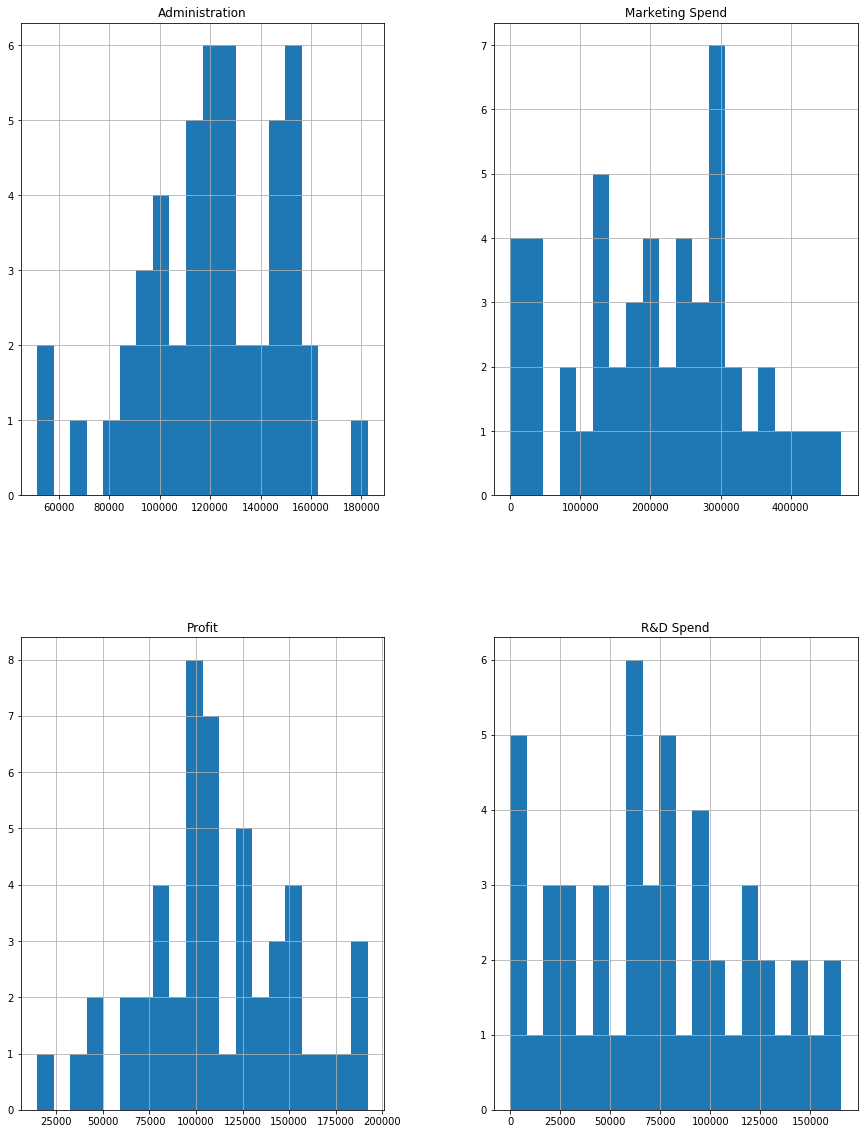

In [126]:
df.hist(bins=20,figsize=(15,20))
plt.show()

### Encoding categorical data
For attribute "State" 


Use pd.concat to join the new columns with your original dataframe


In [127]:
df = pd.concat([pd.get_dummies(df['State'], prefix='State',drop_first=True),df],axis=1)

Note: <code>drop_first=True </code> for avoiding the Dummy Variable Trap

In [128]:
df.head()

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,1,165349.20,136897.80,471784.10,New York,192261.83
1,0,0,162597.70,151377.59,443898.53,California,191792.06
2,1,0,153441.51,101145.55,407934.54,Florida,191050.39
3,0,1,144372.41,118671.85,383199.62,New York,182901.99
4,1,0,142107.34,91391.77,366168.42,Florida,166187.94


Drop the attribute "State"

In [129]:
df.drop('State',axis = 1, inplace = True)

In [130]:
df.head()

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


### Split data into the independent vs dependent variables

In [131]:
X = df.drop('Profit',axis = 1)
y = df['Profit']

### Splitting the dataset into the Training set and the Test set 

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Fitting Multiple Linear Regression to the Training set


In [155]:
from sklearn.linear_model import LinearRegression

In [158]:
regressor = LinearRegression()

In [136]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
y_pred =  regression.predict(X_test)[np.newaxis,:]

### Building the optimal model using Backwark Elimination

Import the library

In [138]:
import statsmodels.formula.api as sm

Add the intercept to X (column of 1)

In [139]:
X = np.append(np.ones((50,1)).astype(int),X, axis = 1) 

Create a X_opt to store the attributes after removing the non-significant attributes

In [ ]:
X_opt = X[:,[0,1,2,3,4,5]]

Create an object of Statsmodels, using a class OLS and fit it by X_opt and y

In [141]:
regressor_OLS = sm.OLS(endog=y,exog = X_opt).fit()

To see the p-value

In [143]:
regressor_OLS.pvalues

const    4.444178e-09
x1       9.532429e-01
x2       9.897941e-01
x3       2.578772e-21
x4       6.077373e-01
x5       1.226769e-01
dtype: float64

p-value of x2 is highest and greater than 0.05, we remove x2

In [144]:
X_opt = X[:,[0,1,3,4,5]]

Repeat above steps

In [145]:
regressor_OLS = sm.OLS(endog=y,exog = X_opt).fit()

In [146]:
regressor_OLS.pvalues

const    1.639196e-09
x1       9.398330e-01
x2       8.293975e-22
x3       6.037292e-01
x4       1.184614e-01
dtype: float64

p-value of x1 is highest and greater than 0.05, we remove x1

In [147]:
X_opt = X[:,[0,3,4,5]]

Repeat above steps

In [148]:
regressor_OLS = sm.OLS(endog=y,exog = X_opt).fit()

In [149]:
regressor_OLS.pvalues

const    1.057379e-09
x1       2.634968e-22
x2       6.017551e-01
x3       1.047168e-01
dtype: float64

p-value of x2 is highest and greater than 0.05, we remove x2

In [147]:
X_opt = X[:,[0,3,5]]

Repeat above steps

In [150]:
regressor_OLS = sm.OLS(endog=y,exog = X_opt).fit()

In [151]:
regressor_OLS.pvalues

const    1.057379e-09
x1       2.634968e-22
x2       6.017551e-01
x3       1.047168e-01
dtype: float64

p-value of x2 is highest and greater than 0.05, we remove x2

In [152]:
X_opt = X[:,[0,3,5]]

### Now, let's Fit Multiple Linear Regression to the Training set with remain variables

Updating X_train, X_test, y_train, y_test base on the X_opt

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_opt,y,test_size=0.2,random_state=0)

Fitting 

In [159]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [160]:
y_pred_opt = regressor.predict(X_test)

### Multiple Linear Regression in Python - Automatic Backward Elimination

In [167]:
import statsmodels.formula.api as sm

In [181]:
def backwardElimination(X,y,sl):
    numVars =  len(X[0])
    for i in range(0,numVars):
        regressor_OLS = sm.OLS(y,X).fit()
        maxVar = max(regressor_OLS.pvalues.astype(float))
        if maxVar > sl:
            for j in range(0,numVars-i):
                if (regressor_OLS.pvalues.astype(float)[j] == maxVar):
                    X = np.delete(X,j,1)
    print(regressor_OLS.summary())
    return X

In [163]:
SL = 0.05 # siginificant value

In [182]:
X_opt = X[:,[0,1,2,3,4,5]]

In [183]:
X_modeled = backwardElimination(X_opt,y,SL)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           3.50e-32
Time:                        07:38:23   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

### Backward Elimination with p-values and Adjusted R Squared:

In [192]:
import statsmodels.formula.api as sm
def backwardElimination(X,y, SL):
    numVars = len(X[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, X).fit()
        maxVar = max(regressor_OLS.pvalues.astype(float))
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = X[:, j]
                    X = np.delete(X, j, 1)
                    tmp_regressor = sm.OLS(y, X).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        X_rollback = np.hstack((X, temp[:,[0,j]]))
                        X_rollback = np.delete(X_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return X_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return X

In [193]:
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt,y, SL)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.16e-31
Time:                        07:42:52   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

In [189]:
X.shape

(50, 6)